# Bucket model

Andrew Ireson, 19th March 2022

Consider the bucket, with inflow $Q_{in}$ (m$^3$/h), storage $S$ (m), and outflow $kS$ (where $k$ (m$^2$/h) is the discharge coefficient):

<img width=300pt src='bucket.png'>

The governing equation for this problem is the ordinary differential equation

$$\frac{dS}{dt}=Q_{in}-kS$$

If we set $Q_{in}$ equal to zero (i.e. a draining bucket), then this equation has the solution

$$S(t)=S_0\exp{(-kt)}$$

where $S_0$ is the initial storage in the bucket. 

Euler's method:

$$S_{i+1}=S_i+\frac{dS}{dt}\Delta t$$

Model challenges:

1. Solve this problem analytically for $Q_{in}=0$ m$^3$/h; $k=0.5$ m$^2$/h; $S_0=1.0$ m$^3$; and $0\leq t \leq 20$

2. Solve this problem numerically for the same parameters

3. Solve this problem numerically for the same parameters, but with $Q_{in}=0.5$ m$^3$/h

In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
# Define a time grid array:
t=np.arange(0,20.1,0.1)
dt=t[1]-t[0]
nt=len(t)

In [12]:
# Define model parameters:
S0=1.0
k=0.5
Qin=0.5

In [13]:
# Calculate S using the analytical solution
S=S0*np.exp(-k*t)

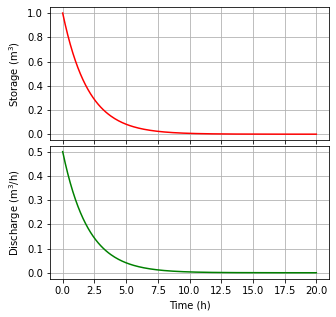

In [14]:
pl.figure(figsize=(5,5))
pl.subplot(2,1,1)
pl.plot(t,S,color='red')
pl.grid()
pl.ylabel('Storage (m$^3$)')
pl.subplot(2,1,2)
pl.plot(t,k*S,color='green')
pl.grid()
pl.xlabel('Time (h)')
pl.ylabel('Discharge (m$^3$/h)')
pl.subplots_adjust(hspace=0.04)

In [15]:
def modelfun(S,k,Qin):
    dSdt=Qin-k*S
    return dSdt

In [16]:
Sm=np.zeros(nt)
Sm[0]=S0
for i in range(nt-1):
    Sm[i+1]=Sm[i]+modelfun(Sm[i],k,Qin)*dt

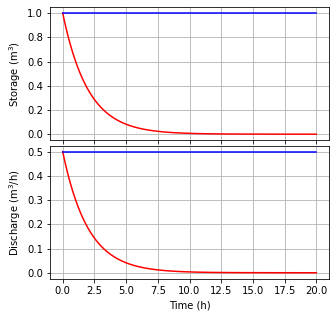

In [17]:
pl.figure(figsize=(5,5))
pl.subplot(2,1,1)
pl.plot(t,S,color='red')
pl.plot(t,Sm,color='blue')
pl.grid()
pl.ylabel('Storage (m$^3$)')
pl.subplot(2,1,2)
pl.plot(t,k*S,color='red')
pl.plot(t,k*Sm,color='blue')
pl.grid()
pl.xlabel('Time (h)')
pl.ylabel('Discharge (m$^3$/h)')
pl.subplots_adjust(hspace=0.04)